# Content-Based Recommender Systems

## Introduction

 CF는 R에서 패턴, 관계를 찾아서 추천해줍니다. 이는 item의 속성을 사용하지 않기때문에 정보의 낭비입니다. contents-based Recommender Systems은 item의 속성 집합으로 추천을 진행합니다. 이는 cold-start문제에 강력한 모습을 보입니다.  

contents-based Recommender Systems은 사용자가 과거에 좋아했던 것과 유사한 item에 연결을 시도합니다. 긍급의 상과관계가 아니라 개체의 속성을 기반으로 합니다. CF에서는 다른 사용자의 등급을 활용하지만 contents기반은 주로 대상 사용자의 등급과 좋아하는 항목의 속성에 중점을 둡니다. 따라서 다른 사용자에 대한 처리는 별로 없습니다.

contents-based Recommender Systems은 데이터의 두가지 소스에 의존합니다.
1. 다양한 항목에 대한 설명(item의 text 데이터)
2. 사용자의 프로필(사용자의 프로필은 im/explicit feedback에서 생성될 수 있습니다.)

다른사용자의 등급을 사용하지 않는것은 cold-start에 강력하다는 장점이 있지만 새로운 사용자(항목)에게 속성과 프로필에 의존하여 추천을 진행하기 떄문에 다양성이 떨어지는 단점이 있습니다.

contents-based 방법은 웹 페이지나 e-commerce와 같이 속성 정보를 많이 사용할 수 있는경우 사용됩니다. 실제로 텍스트 정보를 많이 추출하여 사용합니다. 이는 지식 기반 방식과 밀접한 관계가 있습니다. 주요 차이점은 지식 기반은 사용자와 대화형 시스템이 가능하지만 콘텐츠는 과거 등급을 기반으로 추천을 진행합니다.

## Basic Components of Content-Based Systems

콘텐츠 기반 시스템은 사용자, 항목에 대한 다양한 설명 및 지식으로 작동하므로 이러한 다양한 유형의 비정형 데이터는 표준화된 설명으로 변환해야 합니다. 대부분 text를 키워드로 변환하는것이 좋습니다. 따라서 콘텐츠 기반은 text 도메인에서 잘 작동합니다. 실제로 많은 응용 프로그램이 텍스트 중심입니다.

여러 변형에도 불변하는 콘텐츠 기반의 특정 기본 구성 요소가 있습니다. offline에서 이루어지는 전처리, 학습과 online에서 이루어 지는 예측입니다. 이는 CF에서와 비슷합니다. 

1. Preprocessing and feature extraction: 성능을 위해 매우 중요한 부분이며 도메인별로 다양합니다.
2. Content-based learning of user profiles: 사용자에 따라 다릅니다. 따라서 구매/평가 과거 이력기반 으로 예측합니다. 결과 모델은 개념적으로 사용자의 관심사(평점)를 항목 속성과 관련 시키기 떄문에 사용자 프로필 이라고 합니다. 
3. Filtering and recommendation: 학습한 모델을 사용하여 특정 사용자를 위한 항목에 대한 추천합니다. 예측이 실시간으로 수행되어야 하므로 이 단계는 매우 효율적이여야 합니다.(예측 단계에서는 종종 기존 cls를 사용하기도 합니다.)

## Preprocessing and Feature Extraction

모든 콘텐츠 기반 모델의 첫번째 단계는 항목을 표현하기 위한 (차별적)특징을 추출하는 것 입니다. 여기서 차별적 특징은 사용자의 선호도를 예측하는데 좋은 feature입니다. 이 단계는 도메인에 따라 크게 달라집니다. 예를들어 웹과 제품추천은 성질이 매우 다릅니다.

### Feature Extraction

특징 추출 단계는 다양한 항목에 대한 설명이 추출됩니다. 다차원 표현과 같은 embedding이 사용되기도 하지만 일반적인 접근법은 키워드 추출입니다. 예를들어 책: 제목, 저자, 설명 입니다.

#### Example of Product Recommendation

영화 추천 사이트 IMDB의 예시를 보면 각 영화는 일반적으로 시놉시스, 감독, 배우, 장르와 같은 설명이 있습니다. 주요 문제는 이런 속성들이 추천 과정에서 동일한 가중치를 가지지 않는다는 것 입니다. 예를들어 감독보다 배우의 가중치가 더 높을수 있습니다. 이는 다음 두 방법으로 해결이 가능합니다.
1. 도메인 지식 : 대부분 휴리스틱으로 처리 됩니다. 
2. 자동화된 방법으로 중요성 학습 : 이 프로세스는 featuer slection과 밀접한 관련이 있는 featuer weighting이라고 합니다.

#### Example of Web Page Recommendation
#### Example of Music Recommendation

###  Feature Representation and Cleaning

이 프로세스는 구조화 되지 않은 형식에서 특히 중요합니다. 실제로 제품, 웹에서와 같이 data는 단어들의 모음으로 구성되어 있습니다. 따라서 NLP task와 같은 프로세스가 진행됩니다.
1. Stop-word removal
2. Stemming
3. Phrase extraction

이러한 단계를 시행한 후 tf-idf와 같은 방식으로 단어를 표현합니다.

### Collecting User Likes and Dislikes

내용 이외에도 선호도(Likes and Dislikes)데이터의 수집도 중요합니다. 온라인 단계에서 사용자의 선호도와 콘텐츠가 결합되어 예측을 수행 합니다. Likes and Dislikes는 다음 형식중 하나를 취할 수 있습니다.
1. Ratings
2. Implicit feedback
3. Text opinions
4. Cases

위 4가지 모두 사용자의 Likes and Dislikes는 최종적으로 단항, 이진과 같은 실제 등급으로 변환 됩니다. 이는 라벨 또는 종속 변수로도 볼수 있습니다. 결국 학습 목적으로 활용됩니다.

### Supervised Feature Selection and Weighting

Feature Selection and Weighting의 목표는 가장 유익한 단어만 벡터 공간에 표현을 유지하도록 하는 것 입니다. 실제로 많은 연구가 키워드의 cut-off가 필요하다고 합니다. 여러 실험들은 단어수가 50~300개사이여야 함을 시사 합니다. 기본 아이디어은 noise word가 overfitting을 초래함으로 사전에 제거해야 한다는 것 입니다. 이는 특정 사용자 프로필을 학습하는데 사용할 수 있는 문서수가 적다는 점을 고려할 때 특히 중요합니다.

tf-idf를 생각하면 쉽습니다. 하지만 이건 비지도 방식입니다. 즉 사용자 피드백의 중요도를 주지 못합니다. 이 장에서는 featuer selection의 지도 학습 방식을 소개 합니다. featuer중요성을 평가 하기 위해 특성에 대한 종속 변수의 민감도를 평가 합니다. featuer imformativeness를 계산 하기 위한 척도는 사용자의 등급 체계에 따라 다 다릅니다. 예를들어 이진등급은 범주형이 합리적입니다. 또한 featuer weight에 대한 방법을 소개 합니다.

#### Gini Index

지니 지수는 featuer selection에 가장 일반적으로 사용되는 측도중 하나 입니다. 간단하며 직관적입니다. 지니 계수는 이진, 서수와 같이 적은 선택지 등급에서 효과적입니다. categorical attribute value처럼 순서를 무시하여 처리됩니다. 이는 순서정보를 잃기 떄문에 단점처럼 보이지만, 등급 선택의 폭이 별로 없기 때문에 크게 손실이 없습니다.

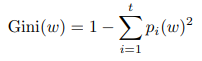

여기서 확률값은 등급이 i점인 문서들중 단어 w를 포함하는 비율입니다. 이런 측도는 예시를 생각해보면 편합니다. -1과 1 인 이진등급에서 w1은 -1점에 많이 분포되어 있습니다. w2는 1에 많이 분포 되어 있습니다. w3는 -1, 1둘다 고루 분포되어 있습니다. w4는 -1, 1둘다 별로 없습니다. 이때 각 지니계수는 w4 > w1, w2 > w3입니다. 즉 tf-idf와 같이 자주 나오는 단어보다 적게 나오는 단어가 정보량이 많다고 판단합니다.

#### Entropy

지니 계수와 비슷합니다. 
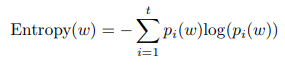

#### χ2-Statistic

카이제곱 통계량은 contingency table로써 단어와 클래스 사이의 동시 발생으로 계산될 수 있습니다. 예를들어 특정 단어가 사용자의 구매선호도와 연관되어 있는지 결정하는 시나리오를 생각해보겠습니다. 사용자가 collection의 10%를 구매했고, 항목 설명에 단어 w가 20% 존재했습니다. 여기서 collection이 1000이라면 contingency table는 다음과 같습니다.

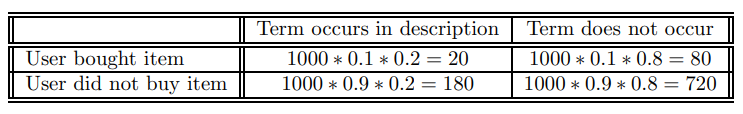

이 contingency table 계산은 단어 w의 발생과 항목에 대한 사용자의 관심이 서로 독힙이라고 가정합니다. 하지만 실제로는 매우 관련되있을 가능성이 있습니다. 예를들어 분할표가 기대값을 벗어나고 사용자가 해당 용어가 포함된 항목을 구매할 가능성이 높은 시나리오는 아래와 같습니다.

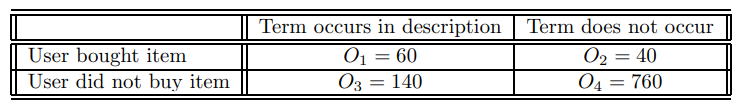

여기서 카이 제곱 통계량은 표의 관측값과 기댓값 사이의 정규화된 편차를 측정합니다. $O_i$는 관측값, $E_i$는 기대값입니다.

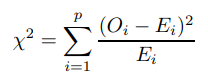

위의 예시로 계산해보면 다음과 같습니다.

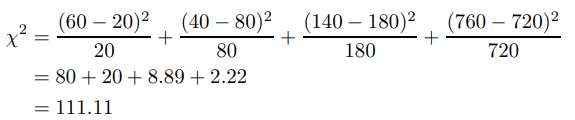

더 나아가 기대값을 계산하지 않아도 카이제곱 값을 계산할 수 있습니다. 이는 E가 행/열에서 관찰된 집계값의 함수이기 때문에 가능합니다. 증명은 연습문제 8에서 다루어지고 있습니다.

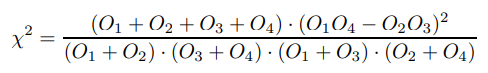

카이 제곱 test는 카이 제곱 분포의 유의수준으로도 해석이 가능합니다. 하지만 실제적인 목적을 위해 카이 제곱 통계량이 클수록 특정 용어 및 항목이 더 큰 정보와 관련되어 있을을 나타내는걸로 충분합니다. 관찰된 값$O_i$이 기대값$E_i$과 같으면 해당 용어가 현재 항목과 관련이 없습니다. 이러한 경우 통계향은 최소값인 0으로 계산됩니다. 즉, 카이 제곱 통계가 가장 큰 상위 K항목을 유지하면 됩니다.

#### Normalized Deviation

위에서 언급한 측도들의 문제점은 등급의 상대적인 정보다 손실된다는 것 입니다. 등급의 세분성이 높은 경우 정규화된 편차가 적절한 척도가 될 수 있습니다. 

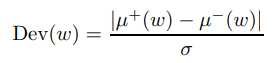

여기서 $\sigma^2$은 모든 문서에서 등급 분산입니다. $\mu^+(w)$는 단어 w를 포함하는 모든 문서의 평균 등급입니다. $\mu^-(w)$는 단어 w를 포함하지 않은 모든 문서의 평균 등급입니다. 즉 평균 등급이 얼마나 다른지 정규화 한 값입니다.

위에 서술한 quantification(수량화)는 모든 문서의 등급 분포와 관련하여 특정 단어가 포함된 문서에 대한 등급의 상대적인 분포를 기반으로 합니다. 이러한 접근 방식은 등급이 수치로 취급될 때 특히 적당합니다.

#### Feature Weighting

Feature Weighting은 Feature Selection의 soft version으로 볼 수 있습니다. 위에서 tf-idf로 간단히 문서 가중치 방법을 논의 했습니다. 하지만 이는 사용자 likes or dislikes에 의존하지 않는 unsupervised measure입니다. supervised measure는 다른 단어에대한 차등 중요성을 산출하기 위해 vector space representation에 추가 가중치를 부여하는데 사용할 수 있습니다. 예를들어 영화 추천에서 장르, 배우 이름을 설명하는 키워드는 영화 시놉시스에서 선택한 단어보다 더 중요합니다. 다른 한편으로 시놉시스의 단어 또한 중요하기때문에 마냥 제외할 수는 없습니다. Feature Weighting는 가중치를 사용하여 다양한 단어를 구별하는 보다 정교한 접근 방식 이빈다. 

Feature Weighting에 대한 가장 간단한 접근 방식을 특징 선택 측정을 하고 이를 사용하여 가중치를 도출하는 것 입니다. 예를 들어 아래와 같이 지니, 앤트로피를 사용하는 것입니다. 많은 경우에 가중 프로세스의 민감도를 제어하기 위해 featuer measure에 휴리스틱을 추가로 적용할 수 있습니다. 

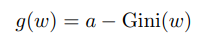

여기서 a는 1보다 큰 양수 입니다. a로 민감도를 제어 할 수 있습니다. a가 낮으면 민감도가 올라갑니다. 그런다음 vector space representation에서 각 단어 w의 가중치에 g(w)를 곱합니다. 앤트로피, 정규화된 편차와 관련하여 유사한 가중치 함수를 정의 할 수있습니다. 적절한 가중치 선택은 도메인데 따라 고도의 휴리스틱 프로세스가 필요합니다. 

## Learning User Profiles and Filtering

Learning User Profiles은 cls, reg와 관련이 큽니다. 등급이 개별값이면 텍스트 분류, 숫가면 회귀와 유사합니다. 텍스트는 특수한 유형의 다차원 데이터 이기 때문에 접근 방식을 모든 유형의 다차원 데이터로 쉽게 일반화 가능합니다.

각각의 경우 특정 사용자가 레이블을 지정한 훈련 문서의 $D_L$이 있다고 가정합니다. 이 사용자는 해당 사용자가 시스템에서 추천을 받을때 활성 사용자라고 합니다. train 문서는 전처리, feature selection 단계에서 추출된 항목의 설명에 해당합니다. 또한 train 문서에는 활성 사용자가 매긴 등급도 포함 됩니다. 다른 사용자(활성 사용자가 아닌 사용자)의 등급은 사용하지 않습니다. 즉, 훈련 모델은 특정 사용자에게 고유하며 임의로 선택된 사용자에게는 사용 할 수 없습니다. 이는 MF와 같은 방법이 모든 사용자에 대해 단일 모델을 구축하는 기존의 CF와 매우 다릅니다. 따라서 특정 사용자에 대한 train model은 사용자 사용자 프로필로 나타납니다.

문서의 label은 숫자, 이진, 단항등급에 해당합니다. $D_L$의 i번쨰 문서에 $c_i$로 표시된 rating이 있다고 가정합니다. 또한 레이블이 없는 test 문서는 $D_u$입니다. $D_u, D_L$모두 특정(활성) 사용자에 따라 다릅니다. test 문서는 사용자가 보지않은 데이터 입니다. $D_u$의 정의는 도메인 마다 다르지만 $D_L$과 같은 프로세스로 추출됩니다. $D_L$에서 훈련된 모델은 $D_u$에서 추천 항목을 만드는데 사용됩니다. 이는 top-k를 선택하는 방식으로 ranking task에도 가능합니다.

###  Nearest Neighbor Classification

가장 간단한 분류 기술중 하나입니다.(이웃기반과 비슷) Let $\bar{X} = (x_1, \dots, x_d)$ and $\bar{Y} = (y_1, \dots, y_d)$는 전처리가 진행된 문서쌍이라고 했을때 두 문서의 유사도를 측정할 수 있습니다. 이 방식은 사용자 선호도를 알수없는 문서를 예측하는데 유용합니다. 

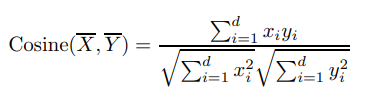

$D_u$의 각 문서에 대하여 $D_L$에서 가장 가까운 인접항목을 결정합니다. 그런다은 Top-k의 등급 평균이 해당 항목의 예측값입니다. 휴리스틱 으로 각 등급에 가중치를 부여하는것도 가능합니다. 등급이 범주형이면 빈도값으로 결정합니다.

이 방식의 문제점은 높은 계산 복잡성($|D_L| \times |D_u|$)에 있습니다. 이는 이전 장에서와 같이 클러스터링으로 해소할 수 있습니다. $D_L$에서 각 등급 별로 $p(<< |D_L|)$개의 클러스터를 만들었을때 등급의 갯수가 $s$이면 $p \times s$개의 $D_L$클러스터가 생성되니다. 이는 간단한 k-means같은 알고리즘으로도 가능합니다. 각 클러스터는 해당 문서들의 집합입니다. 즉 더 큰 문서로 표현됩니다. 이 큰 문서의 벡터 공상 표현은 구성 요소의 단어 빈도를 더하여 추출할 수 있습니다. 등급별로 클러스터링 하기 때문에 등급이 유지 됩니다. 추천을 계산할때는 $D_u$와 각 클러스터의 유사도를 계산하고 선택된 클러스터내의 문서와 다시 유사도를 계산하여 추천을 진행합니다. 

### Connections with Case-Based Recommender Systems

Nearest neighbor methods방식은 지식 기반과 관련이 큽니다. 특히 사례기반과 연결되어 있습니다.(5장에서 자세히 다룹니다.) 주요 차이점은 사례 기반 추천 시스템에서 사용자가 단일 관심 사례를 대화식으로 지정하고 이와 가장 가까운 이웃이 사용자의 관심 항목으로 추천됩니다. 또한 단일 예제만 사용 할 수 있기 때문에 유사성 함수 설계에 상당한 양의 도메인 지식이 필요합니다. 이 단일 예는 대화식으로 지정되기 때문에 과거 등급 보다는 사용자 요구 사항으로 더 적절하게 볼 수 있습니다. 지식 기반 시스템에서는 과거 데이터, 등급을 사용하는데 중점을 덜 둡니다. 

### Bayes Classifier

3장에서는 누락값을 예측하는 방향에 초점을 맞췄었습니다. 콘텐츠 기반 추천 시스템 맥락에서 문제는 텍스트 분류를 위한 Bayes모델이 보다 일반적인 사용으로 해석됩니다. 따라서 텍스트 분류 맥락에서 Bayse model을 다시 살펴 봅니다. 편의를 위해 +1, -1인 이진 등급을 사용한다고 가정합니다. 더 세세한 등급으로의 확장은 간단합니다.

텍스트 데이터에서 Bayes Classifier에 일반적으로 사용되는 베르누이와 다항분포중 베르누이만 설명합니다. 베르누이 모델은 단어의 빈도가 무시되고 문서에 있는 단어의 유무만 고려됩니다. 따라서 문서는 0, 1의 값으로 된 이진 벡터로 표현됩니다. 방식은 앞장과 유사합니다.

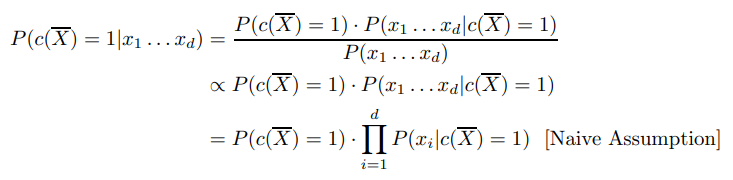

여기서 $c(\bar{X})=1$은 활성 사용자가 $\bar{X}$를 좋아한다는 뜻입니다. -1은 반대 입니다.

#### Estimating Intermediate Probabilities

3장과 같이 라플라시안 스무딩이 사용 될수 있습니다.

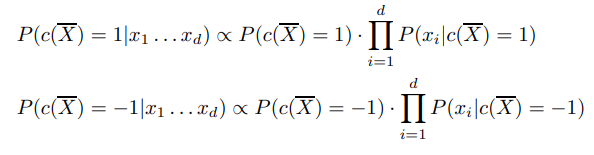

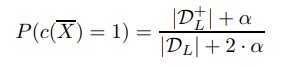

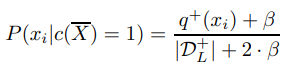

####  Example of Bayes Model

책에서 예시를 줘서 위에서 간단하게 정리 했습니다. 직접 풀어보는것이 읽는것보다 훨씬 이해가 잘 됩니다.

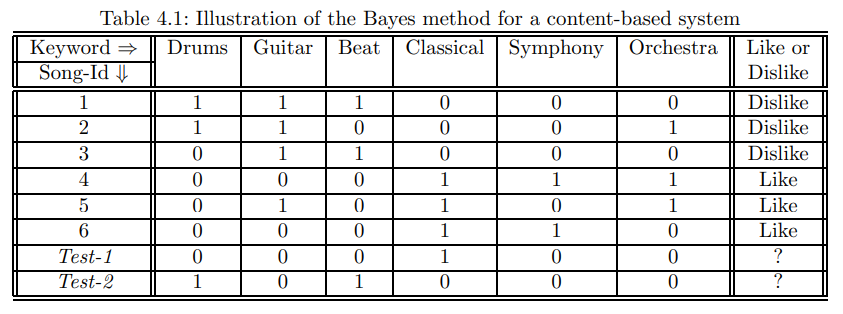

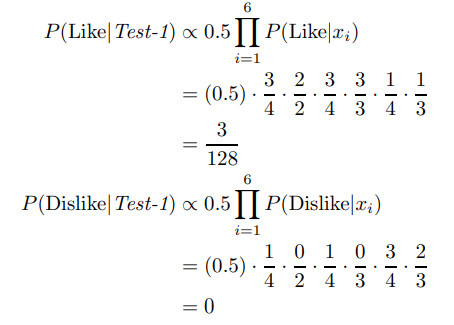

### Rule-based Classifiers

규칙 기반은 연관 규칙 이외에도 다양한 변형이 존재합니다. 책에서는 관련 논문을 읽어보라 하고 넘어가고 연관규칙만 설명합니다.
복습차원에서 support와 confidence 개념을 한번 적고 가겠습니다. 
1. support : 규칙의 antecedent, consequent를 모두 충족하는 행의 비율
2. confidence : antecedent를 만족하는 것들중 consequent를 충족하는 행의 비율

규칙이 $\{순호, 창우\} \Rightarrow \{현석\}$이라면 antecedent는 {순호, 창우}이고 consequent가 {현석}입니다.
콘텐츠 기반 방식에서 규칙 기반 분류기는 CF의 규칙기반과 유사합니다. CF의 item-item규칙에서 규칙의 결과는 항목의 등급에 해당했습니다. 주요차이점은 CF에서 선행 항목은 다양한 항목의 등급입니다. 콘텐츠 기반에서는 항목 설명에 있는 특정 키워드의 존재 입니다. 따라서 규칙 기반은 아래와 같이 표현될 수 있습니다.

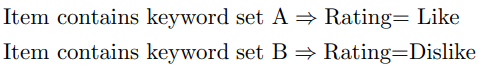

따라서 규칙의 선행 항목은 모든 키워드가 해당 행에 포함된 경우 특정행(항목의 키워드 표현)을 "satisfy"한다고 합니다. 결과는 등급 값이 해당 행의 종속 변수(등급)과 일치하면 해당 결과를 충족한다고 합니다.

프로세스는 다음과 같습니다.
1. 활성 사용자의 프로필($D_L$)을 활용해서 원하는 수준의 support와 confidence로 모든 규칙을 마이닝 합니다.(다른 모든 콘텐츠 기반과 마찬가지로 규칙은 현재 활성 사용자에게만 적용됩니다)
  + 예를 들어 표4.1에서 활성 사용자는 클래식 음악에 관심이 있는것으로 보입니다. 이경우 33%support, 100%confidence를 같는 관련 규칙의 예시는 $\{Classical, Symphony\} \Rightarrow \{like\}$입니다. 따라서 기본 아이디어는 주어진 활성 사용자에 대해 이런 규칙을 모두 찾는것 입니다.
2. 이후 사용자의 관심사를 알수 없는 대상 항목에 대하여 어떤 규칙이 실행되는지 결정하고 전자의 선행 키워드가 후자에 포함되면 대상 항목 설명에 의해 규칙이 실행됩니다.
3. 활성 사용자에 대하여 이러한 실행된 모든 규칙이 결정되면 규칙 결과의 평균이 등급이 됩니다.
  + 결과의 결합은 평균 이외에 다양한 휴리스틱이 존재 합니다. 예를들어 규칙의 confidence를 가중평균으로 사용할 수 있습니다.
  
장점은 이전과 같이 해석가능성입니다.

#### Example of Rule-based Methods

표 4.1에서 33%support 75%confidence 규칙은 다음과 같습니다.

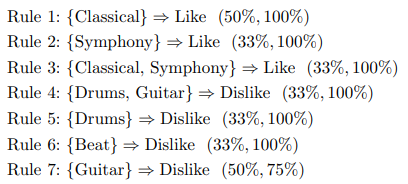

앞서 언급한 규칙은 주로 신뢰가 감소하는 순서로 정렬되며, support가 감소하는 순서로 연결이 끊어집니다. 규칙 2는 테스트1에 의해 실행되는 반면 규칙 5와 6은 테스트2에 의해 실행됩니다. 따라서 활성 사용자에 대한 추천 사한으로는 test-1이 test-2보다 선호 되어야 합니다. test-1에 의해 실행된 규칙은 활성 사용자에게 추천에 대한 이유도 제공합니다. 이러한 설명은 사용자와 서비스 제공자의 관점에서 매우 유용합니다.

### Regression-Based Models

회귀는 이진, 간격, 수치등 다양한 등급 체계에서 사용가능하다는 장점이 있습니다. linear, logistic등등 다양한 모델이 가능하지만 여기선 선형회귀를 설명합니다. 콘텐츠 기반 선형 회귀의 기본 아이디어는 등급이 단어 빈도의 선형함수로 모델링 될 수 있다고 가정하는것 입니다. 식은 $\overline{y} \approx D_L\overline{W}^T$이며 여기서 $\overline{y}$는 rating columns vectors입니다. 일반적인 회귀와 마찬가지로 errors를 최소화 하기위해 다음식을 만족하는 $\overline{W}$를 찾는것이 목표입니다.

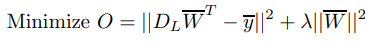

이는 미분을 통해 다음과 같은 식이 도출됩니다.

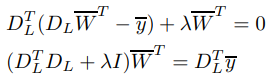

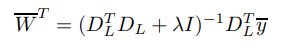

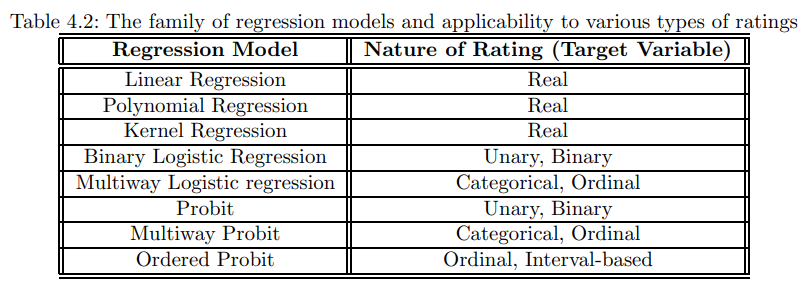

### Other Learning Models and Comparative Overview

회귀처럼 다양한 cls모델또한 사용가능합니다. 3장에서 소개된 tree기반은 콘텐츠 방식에 적용가능하나 텍스트와 같은 높은 차원에서 성능이 좋지 못하다는 실험 결과가 있습니다. 이진 등급의 경우 SVM이 좋은 성능을 냅니다. SVM은 로지스틱 회귀와 매우 유사합니다. 주요 차이점은 손실이 logit함수를 사용하는 것이 아니라 hinge loss를 사용한다는 것 입니다. SVM은 overfitting에 강하며 많은 연구와 구현이 존재합니다. 텍스트와 같은 고차원 데이터의 경우 선형 SVM으로 충분하다는 것이 연구 되었습니다. 신경망은 임의로 복잡한 모델을 구축하는 데 사용할 수 있지만 사용 가능한 데이터의 양이 적을 때는 선능이 낮습니다. 이는 신경망이 기본 데이터의 노이즈에 민감하고 크기가 작을 때 overfitting이 잘 일어나기 떄문입니다.

###  Explanations in Content-Based Systems

콘텐츠 기반은 feature를 기반으로 모델을 추출하기 때문에 추천 프로세스에 해석가능한 인사이트를 제공하는 경우가 많습니다. 예를들어 영화추천시 특정 영화를 좋아할 수 있는 이유에 대하여 사용자에게 제시가 가능합니다. 즉, 사용자는 추천과 함께 제공된 정보를 보고 영화를 볼지 말지 선택이 가능합니다. 예시는 다음과 같습니다.

> “We are playing this track because it features trance roots, four-on-the-floor beats, disco influences, a knack for catchy hooks, beats made for dancing, straight drum beats, clear pronunciation, romantic lyrics, storytelling lyrics, subtle buildup/breakdown, a rhythmic intro, use of modal harmonies, the use of chordal patterning, light drum fills, emphasis on instrumental performance, a synth bass riff, synth riffs, subtle use of arpeggiatted synths, heavily effected synths, and synth swoops.”

위 예시에서 각 특성은 추천 사항이 "좋아요"로 분류하는 중요한 기능이로 볼 수 있습니다. 이러한 세부적인 설명은 항목의 특성보다는 유사한 항목의 관점에서만 설명 할 수있는 CF에서는 부족한 경우가 많습니다. 그러나 통찰력의 성격과 범위는 사용된 특정 모델에 매우 민감 합니다. 예를 들어 Bayes 모델과 규칙 기반 시스템은 분류의 특정 인과관계 측면에서 해석하기 매우 쉽습니다. test-1 예제에 대해 $\{Symphony\} \Rightarrow Like$ 규칙이 실행되는 예를 고려했을때 사용자가 test-1이 설명하는 항목은 교향곡이기 때문에 추천된 것이 분명합니다. 마찬가지로 Bayes 분류 모델에서는 분류를 위한 계산 과정에서  P (Symphony | Like)의 기여도가 가장 큰 것이 분명합니다. 

##  Content-Based Versus Collaborative Recommendations

CF와 Content-Based를 비교하는것은 유익합니다. 

Content-Based의 장점
1. 협업 시스템은 신규 사용자와 신규 항목 모두에 대해 콜드 스타트 문제가있는 반면, 컨텐츠 기반 시스템은 신규 사용자에게만 콜드 스타트 문제가 있습니다.
2. 콘텐츠 기반 방법은 item의 featuer에 대한 설명을 제공합니다. collaborative recommendations에는 이러한 설명이 불가능한 모델이 있습니다.
3. 콘텐츠 기반 방법은 일반적으로 기존의 텍스트 분류방식과 함께 사용할 수 있습니다. 또한 각 사용자 별 분류 문제는 일반적으로 collaborative systems의 경우와 같이 크지 않습니다. 따라서 상대적으로 구현과 사용이 쉽습니다. 

반면에 콘텐츠 기반 방법은 공동 추천자에는없는 몇 가지 단점이 있습니다.

1. 콘텐츠 기반 시스템은 사용자가 지금까지 본 것과 유사한 항목을 찾는 경향이 있습니다. 이 문제를 overspecialization라고 합니다. 1장에서 설명한데로 추천시 일정량의 novelty와 serendipity을 갖는 것이 항상 바람직합니다. novelty는 사용자가 과거에 본것과 다른 항목을 의미 합니다. serendipity은 사용자가 다른 방법으로는 찾지 못했을 수있는 관련성있는 항목을 의미 합니다. 이는 attribute-based classification model이 매우 유사한 item을 추천하는 경향이 있는 콘텐츠 기반 시스템의 문제입니다. 예를 들어 사용자가 클래식 음악을 듣거나 평가한 적이 없는 경우 클래식 음악은 사용자가 지금까지 평가한 속성 값과 매우 다른 속성 값으로 설명되므로 콘텐츠 기반 시스템은 일반적으로 이러한 항목을 추천하지 않습니다. 반명에 CF는 peer 그룹의 관심사를 할용하여 이러한 item을 추천할 수 있습니다. 
2. 콘텐츠 기반 시스템은 새 item에 대한 콜드 스타트 문제를 해결하는데 도움이 되지만 새 사용자를 위해 이러한 문제를 해결하는 데는 도움이 되지 않습니다. 

이러한 단점에도 불구하고 콘텐츠 기반 시스템은 추천 프로세스에서 콘텐츠 기반 지식을 활용할 수 있는 능력 때문에 CF systme을 매우 잘 모완합니다. 이러한 보완적 행동은 종종 하이브리드 추천 시스템(6장)에서 활용되며, 목표는 두 시스템의 장점을 결한하여 더욱 강력한 추천 시스템을 만드는 것 입니다. 일반적으로 콘텐츠 기반 시스템은 다른 유형의 추천 시스템과 함께 사용됩니다.

##  Using Content-Based Models for Collaborative Filtering

CF와 Content-Based Model에는 흥미로운 연관성이 있습니다. 컨텐츠 기반 방법은 협업 필터링에 직접 사용될 수 있습니다. item의 feature는 설명 키워드를 참조하지만 user의 rating을 활용하여 콘텐츠 기반 설명을 정의하는 시나리오를 구상 할 수 있습니다. 각 item에 대해 평가 한 사용자의 user name(또는 identifier)을이 rating과 연결하여 새 "keyword"를 만들 수 있습니다. 따라서 각 item은 해당 item에 평가된 rating 수만큼 많은 키워드로 설명됩니다. 이 접근 방식은 가능한 등급 수가 적을 때(단항, 이진 등급) 일반적으로 더 효과적입니다. 이러한 콘텐츠 기반 설명이 구성된 후에는 기존 콘텐츠 기반 알고리즘과 함께 사용할 수 있습니다.

## Summary

1. item 설명의 콘텐츠 속성은 사용자 등급과 결합되어 사용자 프로필을 생성합니다.
2. 다양한 분류 및 회귀 모델이 이러한 시스템에서 사용됩니다. 
3. 컨텐츠 기반 시스템은 신규 사용자에 대한 콜드 스타트 문제를 처리 할 수 없지만 새 항목에 대한 콜드 스타트 문제를 처리 할 수 있다는 장점이 있습니다.
4. 콘텐츠 기반 추천은 이전에 사용자가 평가 한 항목의 콘텐츠를 기반으로하기 때문에 콘텐츠 기반 시스템의 novelty와 serendipity는 상대적으로 낮습니다.

## Exercises

1. Consider a scenario in which a user provides like/dislike ratings of a set of 20 items, in which she rates 9 items as a “like” and the remaining as a “dislike.” Suppose that 7 item descriptions contain the word “thriller,” and the user dislikes 5 of these items. Compute the Gini index with respect to the original data distribution, and with respect to the subset of items containing the word “thriller.” Should feature selection algorithms retain this word in the item descriptions?

> 설명에 스릴러를 포함하고 좋아요를 누른 영화의 수 = 2  
> 설명에 스릴러를 미포함하고 좋아요를 누른 영화의 수 = 7   
> 설명에 스릴러를 포함하고 싫어요를 누른 영화의 수 = 5  
> 설명에 스릴러를 미포함하고 싫어요를 누른 영화의 수 = 6    
> w = thriller  
> t = like, dislike   
> $ Gini(w) = 1 - ({P_{like}(w)}^2 + {P_{dislike}(w)}^2) = 1 - (\frac{2}{7}^2 + \frac{5}{7}^2) = 0.408$  
> 등급이 두개 이기때문에 Gini(w)는 0과 0.5 사이값이 나오는데 0.4는 너무 큰 값입니다.

2. Implement a rule-based classifier with the use of association pattern mining

>

3. Consider a movie recommender system in which movies belong to one or more of the genres illustrated in the table, and a particular user provides the following set of ratings to each of the movies.
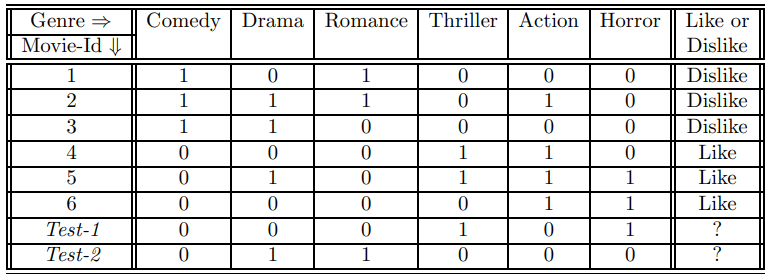
Mine all the rules with at least 33% support and 75% confidence. Based on these rules, would you recommend the item Test-1 or Test-2 to the user?

4. Implement a Bayes classifier with Laplacian smoothing

5. Repeat Exercise 3 with the use of a Bayes classifier. Do not use Laplacian smoothing. Explain why Laplacian smoothing is important in this case.

6. Repeat Exercise 3 with the use of a 1-nearest neighbor classifier.

7. For a training data matrix D, regularized least-squares regression requires the inversion of the matrix (DT D + λI), where λ > 0. Show that this matrix is always invertible.

8. The χ2 distribution is defined by the following formula, as discussed in the chapter:
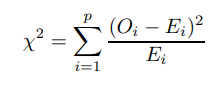
Show that for a 2 × 2 contingency table, the aforementioned formula can be rewritten as follows:  
Here, O1 ...O4 are defined in the same way as in the tabular example in the text.

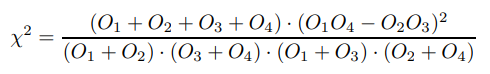